In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sentences = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process é&'"&'(èç_é"&'-)àç_é&"''"')'"' is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells '-(èç-èçà_&é"'=à)é&"'"&é'"'"')'."""

In [3]:

# remove special characters
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)
sentences

'We are about to study the idea of a computational process Computational processes are abstract beings that inhabit computers As they evolve processes manipulate other abstract things called data The evolution of a process is directed by a pattern of rules called a program People create programs to direct processes In effect we conjure the spirits of the computer with our spells '

In [4]:

# remove 1 letter words
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()
sentences

'We are about to study the idea of computational process Computational processes are abstract beings that inhabit computers As they evolve processes manipulate other abstract things called data The evolution of process is directed by pattern of rules called program People create programs to direct processes In effect we conjure the spirits of the computer with our spells'

In [5]:

# lower all characters
sentences = sentences.lower()
sentences

'we are about to study the idea of computational process computational processes are abstract beings that inhabit computers as they evolve processes manipulate other abstract things called data the evolution of process is directed by pattern of rules called program people create programs to direct processes in effect we conjure the spirits of the computer with our spells'

In [6]:
words = sentences.split()
words

['we',
 'are',
 'about',
 'to',
 'study',
 'the',
 'idea',
 'of',
 'computational',
 'process',
 'computational',
 'processes',
 'are',
 'abstract',
 'beings',
 'that',
 'inhabit',
 'computers',
 'as',
 'they',
 'evolve',
 'processes',
 'manipulate',
 'other',
 'abstract',
 'things',
 'called',
 'data',
 'the',
 'evolution',
 'of',
 'process',
 'is',
 'directed',
 'by',
 'pattern',
 'of',
 'rules',
 'called',
 'program',
 'people',
 'create',
 'programs',
 'to',
 'direct',
 'processes',
 'in',
 'effect',
 'we',
 'conjure',
 'the',
 'spirits',
 'of',
 'the',
 'computer',
 'with',
 'our',
 'spells']

In [7]:
vocab = set(words)
vocab_size = len(vocab)
embed_dim = 10
context_size = 2
word_to_ix = {word: i for i, word in enumerate(vocab)}
word_to_ix
ix_to_word = {i: word for i, word in enumerate(vocab)}
ix_to_word

{0: 'effect',
 1: 'they',
 2: 'pattern',
 3: 'computers',
 4: 'computer',
 5: 'evolution',
 6: 'with',
 7: 'create',
 8: 'by',
 9: 'abstract',
 10: 'other',
 11: 'programs',
 12: 'computational',
 13: 'as',
 14: 'the',
 15: 'idea',
 16: 'that',
 17: 'process',
 18: 'directed',
 19: 'in',
 20: 'processes',
 21: 'beings',
 22: 'called',
 23: 'study',
 24: 'we',
 25: 'things',
 26: 'is',
 27: 'program',
 28: 'are',
 29: 'spirits',
 30: 'our',
 31: 'to',
 32: 'conjure',
 33: 'evolve',
 34: 'spells',
 35: 'of',
 36: 'direct',
 37: 'manipulate',
 38: 'rules',
 39: 'about',
 40: 'people',
 41: 'inhabit',
 42: 'data'}

In [8]:
# data - [(context), target]


#  """We are about to study the idea of a computational process.
# Computational processes are abstract beings that inhabit computers.
# As they evolve, processes manipulate other abstract things called data.
# The evolution of a process is directed by a pattern of rules
# called a program. People create programs to direct processes. In effect,
# we conjure the spirits of the computer with our spells."""


data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:5])

[(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'computational'], 'idea')]


In [9]:

embeddings =  np.random.random_sample((vocab_size, embed_dim))
print(embeddings.shape)
embeddings

(43, 10)


array([[0.84353773, 0.99660155, 0.44654282, 0.07367461, 0.30712341,
        0.08221329, 0.83551298, 0.70973565, 0.58496941, 0.02338608],
       [0.86234449, 0.06354418, 0.81521677, 0.18762189, 0.55369753,
        0.63575043, 0.03243276, 0.63164404, 0.47093467, 0.08265527],
       [0.18858412, 0.00215481, 0.08442872, 0.93661394, 0.73125128,
        0.31435845, 0.92666263, 0.47000888, 0.36323377, 0.54506729],
       [0.80881911, 0.5869232 , 0.93754428, 0.64685934, 0.6667376 ,
        0.96482435, 0.06104906, 0.70502266, 0.96830032, 0.26858174],
       [0.85157618, 0.11515397, 0.38794096, 0.74289404, 0.46710838,
        0.87623291, 0.1630009 , 0.90220963, 0.93955903, 0.13592917],
       [0.27714388, 0.12440413, 0.09031895, 0.93289796, 0.03236332,
        0.4472043 , 0.40777525, 0.31495513, 0.73531422, 0.30955611],
       [0.97232054, 0.48480077, 0.19310978, 0.10399466, 0.37434333,
        0.90695357, 0.33887532, 0.82519897, 0.70396468, 0.00208177],
       [0.62907354, 0.11105392, 0.7048239

In [10]:
def linear(m, theta):
    w = theta
    return m.dot(w)

In [11]:

def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())


In [12]:
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [13]:
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    
    return (- out + softmax) / logits.shape[0]

In [14]:

def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)
    return m, n, o

In [15]:
def backward(preds, theta, target_idxs):
    m, n, o = preds
    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)
    return dw

In [16]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

In [17]:
theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))
theta.shape

(40, 43)

In [18]:
# [(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'computational'], 'idea')]

epoch_losses = {}

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)
        
     
    epoch_losses[epoch] = losses

Text(0, 0.5, 'Losses')

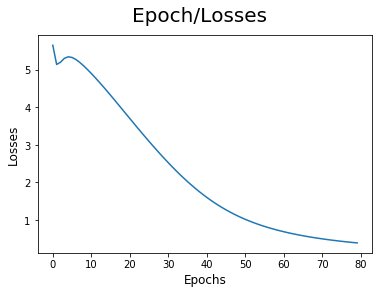

In [19]:
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [20]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]
    
    return word

In [21]:
# (['we', 'are', 'to', 'study'], 'about')
predict(['we', 'are', 'to', 'study'])

'about'

In [22]:
def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1
            
    return (1 - (wrong / len(data)))

In [23]:
accuracy()

1.0